In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !pip install ipdb
import sys
sys.path.insert(0,'..')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
def prep_ax(ax):
    ax.clear()  # Clear the previous plot
    # Remove ticks on both the x and y axes
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Optionally, you can also remove the tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    

# Ambiguous

In [5]:
!pip install rlax

/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


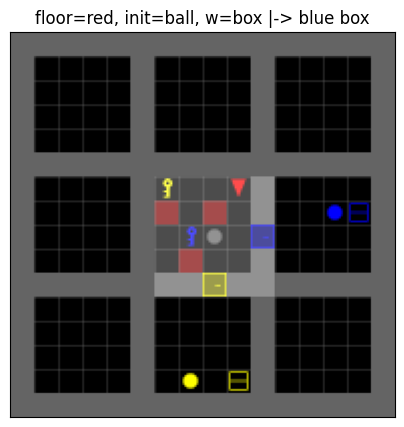

[0.1 0.5 1.  0.  0.  0.  0.  0. ]


/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.task_vector to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.task_vector` for environment variables or `env.get_wrapper_attr('task_vector')` that will search the reminding wrappers.
  logger.warn(


In [8]:
from envs.key_room_objects_test import (
    KeyRoomObjectTest,
    ObjectTestTask
)
import minigrid

floor2task_color = {
    'red': 'blue',
    'green': 'yellow',
}

train_tasks = [
    ObjectTestTask(floor='red', init='ball', w='box', floor2task_color=floor2task_color),
    ObjectTestTask(floor='green', init='box', w='ball', floor2task_color=floor2task_color),
]

test_tasks = [
    ObjectTestTask(floor='red', init='ball', w='ball', floor2task_color=floor2task_color),
    ObjectTestTask(floor='red', init='box', w='ball', floor2task_color=floor2task_color),
    ObjectTestTask(floor='green', init='box', w='box', floor2task_color=floor2task_color),
    ObjectTestTask(floor='green', init='ball', w='box', floor2task_color=floor2task_color),
]
room_colors = list(set([t.goal_color() for t in train_tasks]))


env = KeyRoomObjectTest(
    room_size=6,
    tasks=train_tasks,
    room_colors=room_colors,
)
env = minigrid.wrappers.RGBImgObsWrapper(env, tile_size=12)

def visualize(env, train_tasks, test_tasks):
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    prep_ax(ax)
    obs, info = env.reset()
    ax.imshow(obs['image'])  # Assuming image has shape (C, H, W)
    ax.set_title(f"{env.unwrapped.task.desc()}")
    plt.show()
    print(env.task_vector)
    # print(env.task_color_vector)
    # print("Train")
    # for t in train_tasks: print(t.desc())
    # print()
    # print("Test")
    # for t in test_tasks: print(t.desc())
    
visualize(env, train_tasks, test_tasks)

# Unambiguous: color

/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


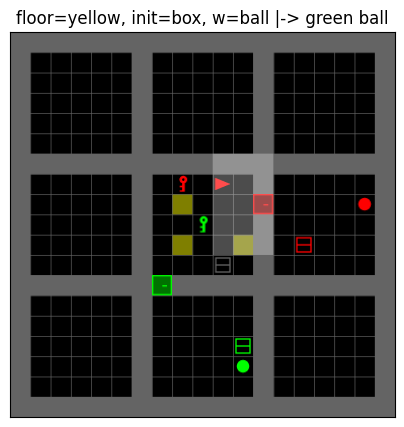

[0.  0.  0.  0.  0.1 0.5 0.  1. ]


/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.task_vector to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.task_vector` for environment variables or `env.get_wrapper_attr('task_vector')` that will search the reminding wrappers.
  logger.warn(


In [9]:
from envs.key_room_objects_test import (
    KeyRoomObjectTest,
    ObjectTestTask
)
import minigrid

# in this setting, the floor color indicates the task color
train_tasks = [
  ObjectTestTask(floor='blue', init='ball', w='box'),
  ObjectTestTask(floor='blue', init='box', w='box'),
  ObjectTestTask(floor='yellow', init='ball', w='ball'),
  ObjectTestTask(floor='yellow', init='box', w='ball'),
]

test_tasks = [
  ObjectTestTask(floor='blue', init='ball', w='ball'),
  ObjectTestTask(floor='blue', init='box', w='ball'),
  ObjectTestTask(floor='yellow', init='ball', w='box'),
  ObjectTestTask(floor='yellow', init='box', w='box'),
]
room_colors = list(set([t.goal_color() for t in train_tasks]))


env = KeyRoomObjectTest(
    room_size=7,
    tasks=train_tasks,
    room_colors=room_colors,
)
env = minigrid.wrappers.RGBImgObsWrapper(env, tile_size=20)
visualize(env, train_tasks, test_tasks)


# Unambiguous: shape

/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


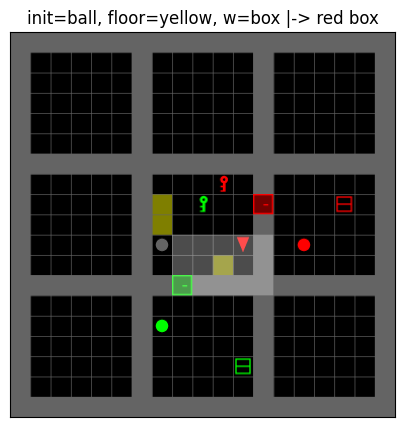

[0.1 0.5 1.  0.  0.  0.  0.  0. ]


/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.task_vector to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.task_vector` for environment variables or `env.get_wrapper_attr('task_vector')` that will search the reminding wrappers.
  logger.warn(


In [10]:
from envs.key_room_objects_test import (
    KeyRoomObjectTest,
    ObjectTestTask
)
import minigrid

# in this setting, the floor color indicates the task color
train_tasks = []
test_tasks = []
for c in ['blue', 'yellow']:
    train_tasks.append(
      ObjectTestTask(
        source='shape', init='ball', floor=c, w='box'))
    test_tasks.append(
      ObjectTestTask(
        source='shape', init='ball', floor=c, w='ball'))

    train_tasks.append(
      ObjectTestTask(
        source='shape', init='box', floor=c, w='ball'))
    test_tasks.append(
      ObjectTestTask(
        source='shape', init='box', floor=c, w='box'))

room_colors = list(set([t.goal_color() for t in train_tasks]))


env = KeyRoomObjectTest(
    room_size=7,
    tasks=train_tasks,
    room_colors=room_colors,
)
env = minigrid.wrappers.RGBImgObsWrapper(env, tile_size=20)
visualize(env, train_tasks, test_tasks)


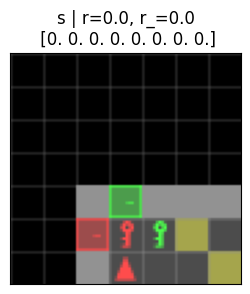

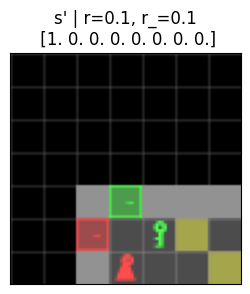

/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.task to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.task` for environment variables or `env.get_wrapper_attr('task')` that will search the reminding wrappers.
  logger.warn(
/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


427: reward: 0.1 for ('red', 'box')
state-features: [1. 0. 0. 0. 0. 0. 0. 0.]
task: [0.1 0.5 1.  0.  0.  0.  0.  0. ]
terminated: False
truncated: False


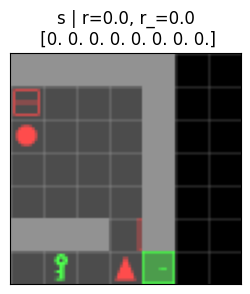

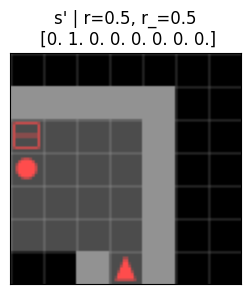

/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.task to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.task` for environment variables or `env.get_wrapper_attr('task')` that will search the reminding wrappers.
  logger.warn(
/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


12302: reward: 0.5 for ('red', 'box')
state-features: [0. 1. 0. 0. 0. 0. 0. 0.]
task: [0.1 0.5 1.  0.  0.  0.  0.  0. ]
terminated: False
truncated: False


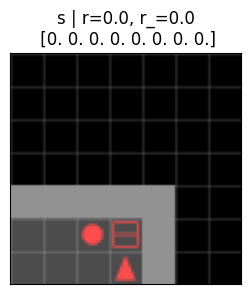

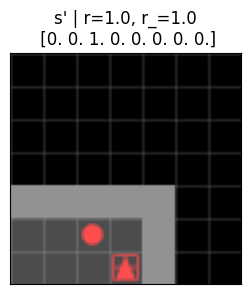

17207: reward: 1.0 for ('red', 'box')
state-features: [0. 0. 1. 0. 0. 0. 0. 0.]
task: [0.1 0.5 1.  0.  0.  0.  0.  0. ]
terminated: True
truncated: False
BREAKING


/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.task to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.task` for environment variables or `env.get_wrapper_attr('task')` that will search the reminding wrappers.
  logger.warn(


In [33]:
from pprint import pprint
# import lib.env_wrappers as custo

train_tasks = [
    ObjectTestTask(
        source='shape', init='ball', floor=c, w='box'),
    ObjectTestTask(
        source='shape', init='box', floor=c, w='ball')
]
room_colors = list(set([t.goal_color() for t in train_tasks]))
env = KeyRoomObjectTest(
    room_size=6,
    tasks=train_tasks,
    max_steps_per_room=100000,
    room_colors=room_colors,
    include_task_signals=True,
)
use_options = False

env = minigrid.wrappers.DictObservationSpaceWrapper(env)
if use_options:
    env = custom_wrappers.GotoOptionsWrapper(env)
env = minigrid.wrappers.RGBImgPartialObsWrapper(env, tile_size=12)
# env = minigrid.wrappers.RGBImgObsWrapper(env, tile_size=12)


obs, info = env.reset()
# Create a figure and axis for plotting
# fig, ax = plt.subplots(1,1, figsize=(3,3))
# prep_ax(ax)
# ax.imshow(obs['image'])  # Assuming image has shape (C, H, W)
# ax.set_title(f"Reset: {env.task.goal()}")

def display(obs, reward, prime=False):
    computed_r = (obs['state_features']*obs['task']).sum(-1)
    suff = lambda x: x+"'" if prime else x

    title = suff("s")
    title += f" | r={reward}, r_={computed_r}"
    title += f"\n {str(obs['state_features'])}"
    fig, ax = plt.subplots(1,1, figsize=(3,3))
    prep_ax(ax)
    ax.imshow(obs['image'])  # Assuming image has shape (C, H, W)
    ax.set_title(title)
    plt.show()
    plt.pause(0.1)  # Pause for a moment to display the image

for t in range(100000):
    if use_options:
        actions = list(range(info['nactions']))
    else:
        nactions = env.action_space
        actions = list(range(env.action_space.n))
    action = random.choice(actions)
    obs, reward, done, truncated, info = env.step(action)
    
    if reward > 0.0:
        # Extract the image from the observation
        print("="*50)
        display(prior_obs, prior_reward, prime=False)
        display(obs, reward, prime=True)
        # fig, ax = plt.subplots(1,1, figsize=(3,3))
        # prep_ax(ax)
        # ax.imshow(prior_obs['image'])  # Assuming image has shape (C, H, W)
        # ax.set_title(f"s")
        
        # Display the image with the action as the title
    

        # display(obs, reward, prime=False)

        print(f"{t}: reward: {reward} for {env.task.goal()}")
        print(f"state-features: {obs['state_features']}")
        print(f"task: {obs['task']}")
        print(f"terminated: {done}")
        print(f"truncated: {truncated}")
        # break
        if done:
            print("BREAKING")
            break

    prior_obs = obs
    prior_reward = reward
        
# Close the plot window at the end
plt.close()

In [13]:
print(env.unwrapped._max_steps)

200
